### Identifying hate speech using Deep Learning
Data Preprocessing and Exploratory data analysis


### Data preprocessing


* Extract and create a word cloud of all the countries
* Top 10 countries

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ogunl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
%matplotlib inline
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from operator import itemgetter
from wordcloud import WordCloud
from textblob import TextBlob
from pylab import figure, axes, pie, title, show

import pandas as pd


In [4]:
df = pd.read_csv('C:/Users/ogunl/Downloads/election.csv', names = ['Tweet', 'Location', 'Date'], encoding = "ISO-8859-1")

There are 4217909 tweets in the data base.

In [6]:
print(len(df))
x=df.Tweet.head(20)[0]
y=df.Tweet.head(20)[1]
z = df.Tweet.head(20)[19]

df.Tweet.head(50)


4217909


0     RT @ani_nomso: Fela sang about Buhari's Fraudu...
1     RT @ani_nomso: Fela sang about Buhari's Fraudu...
2        @ogundamisi @atiku So? https://t.co/MSYsZPtwCn
3     RT @femiaribisala: DEJA VU\nWhen Buhari seized...
4     RT @ipobworldnews: OFFICIAL LAUNCH OF TERROR F...
5     @atiku @FranceAbuja @EUinNigeria Dont Wait Til...
6                           @atiku @PeterObi Fantastic!
7     RT @ani_nomso: Fela sang about Buhari's Fraudu...
8     @chitraaum @manojkumarmukul Are ma'am bjp pdp ...
9     RT @NatashaAkpoti: APC Kogi Thugs Attack Natas...
10    @bukolasaraki @dino_melaye @SPNigeria @Oluwole...
11    RT @DOlusegun: Lmao. No. He will attend all of...
12    RT @OUKtweets: #AbiaAPCRally\nI just arrived t...
13    RT @dondekojo: Important Thread on Election Se...
14    RT @Sadeeq022: Congratulation Prof Mahmoud Yak...
15    @MsTyma_ I wan ask sef. These guys no go let @...
16    Buharis Administration Projects in South West...
17    Most defectors to APC are molesOmokri htt

In [ ]:
#df['Location'] = df['Location'].str.lower()
df['Location'].str.strip().value_counts()

In [ ]:
pd.Series(['foo', 'fuz', np.nan]).str.replace('f.', 'j', regex= True)

In [ ]:
df['Location'] = df['Location'].replace('lag.*', 'lagos' , regex = True)
df['Location'] = df['Location'].replace('abuja.*|federal cap.*', 'abuja' , regex = True)
df['Location'] = df['Location'].replace('kano.*', 'kano' , regex = True)
df['Location'] = df['Location'].replace('kaduna.*', 'Kaduna' , regex = True)
df['Location'] = df['Location'].replace('ibada.*', 'ibadan' , regex = True)

In [ ]:
df['Location'] = df['Location'].dropna()
df['Location'].value_counts()

In [ ]:
#df['Location'] = df['Location'].replace('niger.*', "" , regex = True)
lsst = [i for i in df['Location'] if i not in ['nigeria','','everywhere','earth','worldwide', 'africa',]]
pd.Series(lsst).value_counts()

In [ ]:
plt.figure(figsize = (14,6))
loc = pd.Series(lsst).value_counts().head(20)
ax = loc.plot.bar()
ax.set_xticklabels(pd.Series(lsst).value_counts().head(20).index, rotation=70)
plt.show()

In [ ]:
#wordseries.value_counts()

### Needed Functions

In [7]:
#Needed Functions
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
stopwrd = set(stopwords.words('english'))
def RemoveUrl(wordseries):
    word = ''
    for wrd in wordseries.split():
        if wrd[:4] != 'http':
            word = word + wrd + ' '
    return word.strip()

def RemoveStopWord(data):
    word = ''
    for wrd in data.split():
        if wrd not in stopwrd:
            word = word + ' ' + wrd
    return word.strip()
def RemoveElement(lst, element):
    word = ''
    for wrd in lst.split():
        if not wrd.startswith(element):
            word = word + ' ' + wrd
    return word.strip()

def Ngram(data, keyword):
    gramLst = []
    for i in range(len(data)):
        if data[i] == keyword :
            if data[i-1] == data[i] or data[i] == data[i+1]:
                continue
            elif data[i-1] == data[i+1]:
                needOnly = data[i-1] + ' ' + data[i]
                gramLst.append(needOnly)
            else:
                needLeft = data[i-1] + ' ' + data[i]
                needRight = data[i] + ' ' + data[i + 1]
                gramLst.append(needLeft)
                gramLst.append(needRight)
    return gramLst

def Onegram(data, keyword):
    gramLst = []
    for i in range(len(data)):
        if data[i] == keyword :
            if data[i-1] == data[i] or data[i] == data[i+1]:
                continue
            elif data[i-1] == data[i+1]:
                needOnly = data[i-1]
                gramLst.append(needOnly)
            else:
                needLeft = data[i-1]
                needRight = data[i + 1]
                gramLst.append(needLeft)
                gramLst.append(needRight)
    return gramLst

def PlotWordCloud(AList):
    text = ' '.join(AList)
    wc = WordCloud(width=800, height=600, margin=5,
              stopwords=[], prefer_horizontal = 1.5).generate(text)

    n = plt.figure(figsize=(10,14), dpi=100)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def GetTweetSentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'


print(z)
print()
print(RemoveUrl(z))
print(RemoveElement(z, 'RT'))


RT @RadioBiafraD: #Biafra:

#Biafra_Is_The_Only_Way_Out! 
#Boycott2019NigeriaElection &amp; #SupportBiafraReferendum 
#BiafraExit 
@POTUS
@ICRC

RT @RadioBiafraD: #Biafra: #Biafra_Is_The_Only_Way_Out! #Boycott2019NigeriaElection &amp; #SupportBiafraReferendum #BiafraExit @POTUS @ICRC
@RadioBiafraD: #Biafra: #Biafra_Is_The_Only_Way_Out! #Boycott2019NigeriaElection &amp; #SupportBiafraReferendum #BiafraExit @POTUS @ICRC


In [8]:
#DF removing duplicates and words less than two

newDf = pd.DataFrame()
newDf['Tweet'] = df.Tweet.drop_duplicates()


### Data Cleaning

In [9]:

newDf['cleanTweet'] = newDf['Tweet'].apply(lambda x: RemoveUrl(x))
newDf['cleanTweet'] = newDf['cleanTweet'].apply(lambda x: x.lower())
newDf['cleanTweet'] = newDf['cleanTweet'].apply(lambda x: emoji_pattern.sub(r'', x))
newDf['cleanTweet'] = newDf['cleanTweet'].apply(lambda x: RemoveElement(x, '@'))
newDf['cleanTweet'] = newDf['cleanTweet'].apply(lambda x: RemoveElement(x, 'rt'))
newDf['cleanTweet'] = newDf['cleanTweet'].apply(lambda x: RemoveStopWord(x))
newDf['cleanTweet'] = newDf['cleanTweet'].str.replace("[^a-zA-Z#]", " ") 


In [10]:
newDf['cleanTweet'] = newDf['cleanTweet'].apply(lambda x: ' '.join([i for i in x.split() if len(i) > 2]))
newDf.cleanTweet.head(20)

0     fela sang buhari fraudulence amp failures year...
2                                                      
3     deja buhari seized power nigeria gdp overthrow...
4     official launch terror flag president muhammad...
5     dont wait till happen track control listen liv...
6                                             fantastic
8          bjp pdp phr bjp jdu alliance aap kya kahengi
9     apc kogi thugs attack natasha sdp team gov yah...
10                                                     
11    lmao attend rallies asked tinubu handle campai...
12    #abiaapcrally arrived umuahia township stadium...
13    important thread election security president b...
14    congratulation prof mahmoud yakubu defeating p...
15    wan ask sef guys let get rest mind even think ...
16    buhari administration projects south west nige...
17                           defectors apc moles omokri
18    today joined presidential candidate great part...
19    #biafra #biafra the only way out #boycott 

In [17]:
#DF containging presidential candidates
pres = ['atiku', 'buhari', 'fela', 'sowore', 'moghalu']
presDf = pd.DataFrame()
presCan = newDf.cleanTweet[newDf.cleanTweet.str.contains('atiku|buhari|fela|sowore|moghalu', regex = True)]
presDf['Tweets'] = presCan

In [19]:
presDf['Sentiment'] = presDf['Tweets'].apply(lambda x: GetTweetSentiment(x))
#presDf.head(50)

In [11]:
sdf = newDf.sample(n=20000, random_state=1)
sdf['Sentiment'] = sdf['cleanTweet'].apply(lambda x: GetTweetSentiment(x))

In [12]:
sdf
sdf['SentIndex'] = sdf['Sentiment'].apply(lambda x : 0 if x == 'negative' else 1)

In [13]:
sdf 

,Tweet,cleanTweet,Sentiment,SentIndex
1054198,Adesua Clears Air On Banky W Allegedly Receivi...,adesua clears air banky allegedly receiving bu...,negative,0
3686672,Ikot Ekpene Senatorial District Result (Oruk A...,ikot ekpene senatorial district result oruk an...,neutral,1
296256,"Atiku wan sell nnpc. That man never enter, e g...",atiku wan sell nnpc man never enter sell finis...,negative,0
2937075,You people should stop spreading FAKE News for...,people stop spreading fake news god sake elect...,negative,0
4093365,#NigeriaDecides2019 #NigeriaDecides @BashirAhm...,#nigeriadecides #nigeriadecides #nextlevel,neutral,1
1214855,@PhilipObin Even if buhari spend 16yrs in offi...,even buhari spend yrs office never achieve oba...,neutral,1
1305360,@DeleMomodu I guess someone is broke... They a...,guess someone broke want atikus money know ati...,neutral,1
1772621,Today determines the faith of our great nation...,today determines faith great nation next years...,positive,1
764778,RT @ultrascanhumint: Newspaper review: INEC un...,newspaper review inec uncovers new plot vote b...,positive,1
1564533,"@GbenroAdegbola @iDeric Dats d question, I don...",dats question understand atikulated folks shou...,neutral,1


In [101]:
#sdf['Sent'] = sdf['Sentiment'].map(lambda x : 0 if x == 'negative' )
#sdf['Sent'] = sdf['Sentiment'].apply(lambda x : 1 if x == 'neutral' else 2) 

SyntaxError: invalid syntax (<ipython-input-101-573b66d5ff77>, line 1)

In [89]:
# import scipy
# a = [2,-5,-1,1,0,3,0,-1,-1,-1,3,-2,21,-14,7,0,-6, 1, -8, 5,-3,-5,3,-6,18,-2,-4,0,-2,73,-2,5,13, -16, -33, 18, -25, 30, 105, -20, 16, 154, 19, -3, 16, 107, -32, -29]
# # b = [-27, -26, -22, -9, 6, -12, -14, -36, -28, -17, -13, -34, -1, -36,-3,-2, -3, -4, -32, -4, -14, -36, -14, -36, -6, -32, -9, -25, -19, 49, -31, -20, 13, -16, -33, 18, -25, 30, 105, -20, 16, 154, 19, -3, 16, 107, -32, -29]
# print(len(a))
# print(len(b))
# scipy.stats.spearmanr(a,b)

48
48


SpearmanrResult(correlation=0.7734638950758049, pvalue=1.1613160422492006e-10)

In [ ]:

# #bag of words 
# bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
# bow = bow_vectorizer.fit_transform(sdf.cleanweets)
# bow.shape

In [ ]:
# #tf - idf
# tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
# tfidf = tfidf_vectorizer.fit_transform(presDf.Tweets) 
# tfidf.shape

In [ ]:
# #word2vec model

# tokenized_tweet = presDf.Tweets.apply(lambda x: x.split()) # tokenizing 
# model_w2v = gensim.models.Word2Vec(
#             tokenized_tweet,
#             size=200, # desired no. of features/independent variables
#             window=5, # context window size
#             min_count=2,
#             sg = 1, # 1 for skip-gram model
#             hs = 0,
#             negative = 10, # for negative sampling
#             workers= 2, # no.of cores
#             seed = 34) 

# model_w2v.train(tokenized_tweet, total_examples= len(presDf.Tweets), epochs=20)
# #model_w2v.wv.most_similar(positive="dinner")
# #model_w2v.wv.most_similar(positive="dinner")


In [ ]:
# # Extracting train and test BoW features 
# train_bow = bow[:31962,:] test_bow = bow[31962:,:] 

# # splitting data into training and validation set 
# xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],random_state=42,test_size=0.3)
# lreg = LogisticRegression() 

# # training the model 
# lreg.fit(xtrain_bow, ytrain) 
# prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
# prediction_int = prediction_int.astype(np.int) 

# f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

In [ ]:
# #Predicting on test set

# test_pred = lreg.predict_proba(test_bow) 
# test_pred_int = test_pred[:,1] >= 0.3 
# test_pred_int = test_pred_int.astype(np.int) 
# test['label'] = test_pred_int 
# submission = test[['id','label']] 
# submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

## Modeling 

In [14]:
#Modeling
import sklearn
from sklearn.model_selection import train_test_split
train,test = train_test_split(sdf,test_size=0.2,random_state=42)

In [15]:
train_clean_tweet=[]
for tweet in train['cleanTweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['cleanTweet']:
    test_clean_tweet.append(tweet)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [18]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    #KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    #AdaBoostClassifier(),
]

In [19]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
f1 = []
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['SentIndex'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['SentIndex'])
        pred = fit.predict(dense_test)
    
    f1s = f1_score(pred,test['SentIndex'])
    accuracy = accuracy_score(pred,test['SentIndex'])
    Accuracy.append(accuracy)
    f1.append(f1s)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(f1))


Accuracy of LogisticRegressionis [0.9267507378588677]


C:\Users\ogunl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVCis [0.9267507378588677, 0.9267507378588677]
Accuracy of DecisionTreeClassifieris [0.9267507378588677, 0.9267507378588677, 0.9756524274675609]
Accuracy of RandomForestClassifieris [0.9267507378588677, 0.9267507378588677, 0.9756524274675609, 0.972933854392821]


In [20]:
pd.DataFrame({'Model' : Model, 'Accuracy Score' : Accuracy, 'F1 Accuracy Score':f1})

,Model,Accuracy Score,F1 Accuracy Score
0,LogisticRegression,0.86350,0.926751
1,SVC,0.86350,0.926751
2,DecisionTreeClassifier,0.95825,0.975652
3,RandomForestClassifier,0.95325,0.972934


Text(0.5, 1.0, 'Accuracies of Models')

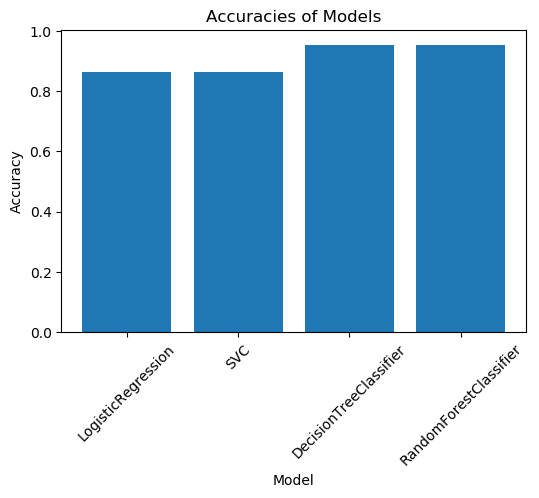

In [109]:
plt.figure(figsize=(6,4), dpi=100)
Index = [1,2,3,4]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [ ]:
#Later analysis 

##newDf.Tweet[~newDf.Tweet.str.contains('atiku|buhari|fela|sowore|moghalu', regex = True)]

In [ ]:
presDf

In [102]:
sdf.to_csv('C:/Users/ogunl/Downloads/sampleTweet.csv', sep = ',')
#df.Tweet.head(50)[0]

In [96]:
sdf

,Tweet,cleanTweet,Sentiment,SentIndex,Sent
1054198,Adesua Clears Air On Banky W Allegedly Receivi...,adesua clears air banky allegedly receiving bu...,negative,0,0
3686672,Ikot Ekpene Senatorial District Result (Oruk A...,ikot ekpene senatorial district result oruk an...,neutral,1,1
296256,"Atiku wan sell nnpc. That man never enter, e g...",atiku wan sell nnpc man never enter sell finis...,negative,0,0
2937075,You people should stop spreading FAKE News for...,people stop spreading fake news god sake elect...,negative,0,0
4093365,#NigeriaDecides2019 #NigeriaDecides @BashirAhm...,#nigeriadecides #nigeriadecides #nextlevel,neutral,1,1
1214855,@PhilipObin Even if buhari spend 16yrs in offi...,even buhari spend yrs office never achieve oba...,neutral,1,1
1305360,@DeleMomodu I guess someone is broke... They a...,guess someone broke want atikus money know ati...,neutral,1,1
1772621,Today determines the faith of our great nation...,today determines faith great nation next years...,positive,1,1
764778,RT @ultrascanhumint: Newspaper review: INEC un...,newspaper review inec uncovers new plot vote b...,positive,1,1
1564533,"@GbenroAdegbola @iDeric Dats d question, I don...",dats question understand atikulated folks shou...,neutral,1,1


In [ ]:
wordlst = [wrd for tw in newDf['Tweet'] for wrd in tw.split()]
wordseries = pd.Series(wordlst)

In [ ]:
len(wordlst)

In [ ]:
atiGram = Ngram(wordlst, 'atiku')
buhaGram = Ngram(wordlst, 'buhari')
sowoGram = Ngram(wordlst, 'sowore')
felaGram = Ngram(wordlst, 'fela')
moghGram = Ngram(wordlst, 'moghalu')

In [ ]:
oneAti = Onegram(wordlst, 'atiku')
oneSowo = Onegram(wordlst, 'sowore')
oneFela = Onegram(wordlst, 'fela')


In [ ]:
#oneBuha = Onegram(wordlst, 'buhari')
PlotWordCloud(buhaGram)

In [ ]:
PlotWordCloud(oneFela)

In [ ]:
PlotWordCloud(sowoGram)

In [ ]:
PlotWordCloud(oneSowo)

In [ ]:
PlotWordCloud(oneAti)

In [ ]:
PlotWordCloud(buhaGram)

In [ ]:
PlotWordCloud(atiGram)

In [ ]:
PlotWordCloud(sowoGram)

In [110]:
#Top 20 words in the data
top20 = wordseries.value_counts().head(20)
plt.figure(figsize = (14,6))
top20.plot.bar()
plt.show()

NameError: name 'wordseries' is not defined

In [ ]:
#top contestant by popularity on twitter

keys = ['miracle', 'cee-c','alex', 'nina', 'lolu',  'khloe', 'tobi', 'anto' ]
cnt = [countWrd(wordlst,x) for x in keys]
cntDict2 = dict(zip(keys,cnt))
sortedlist = sorted(cntDict2.items(), key=itemgetter(1), reverse = True)


plt.figure(figsize=(16,8), dpi = 100)
ax = plt.bar(cntDict2.keys(), cntDict2.values(), color = 'purple')
plt.show()

pd.DataFrame(sortedlist, columns = ['Names','Counts'])

In [ ]:
#Top usernnames 

wordat = wordseries[wordseries.apply(lambda x: x[0] == '@')]

topUser = wordat.value_counts()[:20]
topUserDf = pd.DataFrame({
    'Username': topUser.index,
    'Counts' : topUser.values})
print(topUserDf)

needLst = [x for x in wordat if x in topUser.index ]

plt.figure(figsize=(8,6), dpi=100)
ax = sns.countplot(x = needLst, order = topUser.index)
ax.set_xticklabels(topUser.index, rotation=70)
plt.show()

In [ ]:
#Top Hashtags 

wordhash = wordseries[wordseries.apply(lambda x: x[0] == '#')]

topUser = wordhash.value_counts()[:20]
topUserDf = pd.DataFrame({
    'Username': topUser.index,
    'Counts' : topUser.values})
print(topUserDf)

needLst = [x for x in wordhash if x in topUser.index ]

plt.figure(figsize=(8,6), dpi=100)
ax = sns.countplot(x = needLst, order = topUser.index)
ax.set_xticklabels(topUser.index, rotation=70)
plt.show()

In [ ]:
plt.figure(figsize = (14,6))


In [ ]:
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt

# Packages for data preparation
from sklearn.model_selection import train_test_split
# from nltk.corpus import stopwords
#from keras.preprocessing.text import Tokenizer
# #from keras.utils.np_utils import to_categorical
# from sklearn.preprocessing import LabelEncoder

# # Packages for modeling
from keras import models
# from keras import layers
# from keras import regularizers

In [ ]:
import numpy